In [2]:
import os
from os.path import exists
from tifffile import imread
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib import cm
import numpy as np
import pandas as pd
from rich.progress import track

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
um_per_pixel = 0.117
s_per_frame = 2
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_coralled by nano domains/FUS488_FL_PAINT/example_tracks-timelapsePAINT/FOV4-46"
os.chdir(folder_save)

# load dataset
fname_csv = "20230928-FOV-4-condensateID-46-left-timelapsePAINT_reformatted.csv"
fname_tif = "20230928-FOV-4-condensateID-46-left-timelapsePAINT.tif"

df = pd.read_csv(fname_csv)
video = imread(fname_tif)

# color
cmap_color_end = "#00274c"
cmap_color_start = "#ffcb05"
cmap_name = "maize2blue"
cmap_track = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

cmap_color_end = "#00FFFF"
cmap_color_start = "black"
cmap_name = "dark2cyan"
cmap_img = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


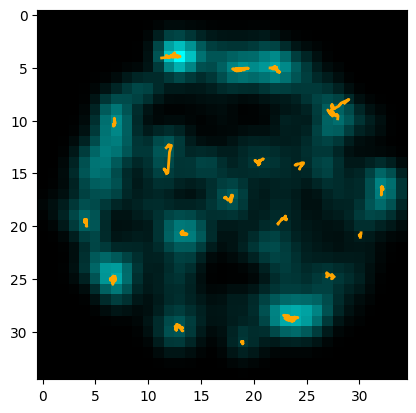

In [4]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(video[0], cmap=cmap_img)
tracks = df
tracks = tracks.astype(float)
for trackID in tracks["trackID"].unique():
    track = tracks[tracks["trackID"] == trackID]
    track = track.sort_values(["t"])
    plt.plot(
        track.x,
        track.y,
        color="orange",
        lw=2,
    )

plt.savefig(
    "ref.png",
    format="png",
    dpi=300,
    bbox_inches="tight",
)

(-0.5, 34.5, -0.5, 34.5)

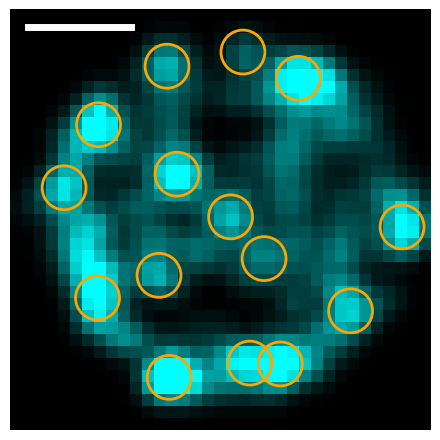

In [32]:
frame = 5
img_blue = video[frame - 1]
plt.imshow(
    img_blue,
    cmap=cmap_img,
    vmax=2,
)
# Add current circle
tracks = df[df["t"] == frame]
tracks = tracks.astype(float)
plt.scatter(
    tracks.x,
    tracks.y,
    edgecolors="orange",
    s=1000,
    facecolors="none",
    lw=2,
)

# scale bar
scale_bar_offset = 0
scalebar_length_um = 1
base_x = 1
base_y = 33
scalebar_length_pxl = scalebar_length_um / um_per_pixel
plt.plot(
    [
        base_x + scale_bar_offset,
        base_x + scale_bar_offset + scalebar_length_pxl,
    ],
    [base_y + scale_bar_offset, base_y + scale_bar_offset],
    "-",
    color="white",
    lw=5,
)
plt.xlim(0, img_blue.shape[0])
plt.ylim(0, img_blue.shape[1])
ax.invert_yaxis()
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")

In [24]:
video.shape

(49, 35, 35)

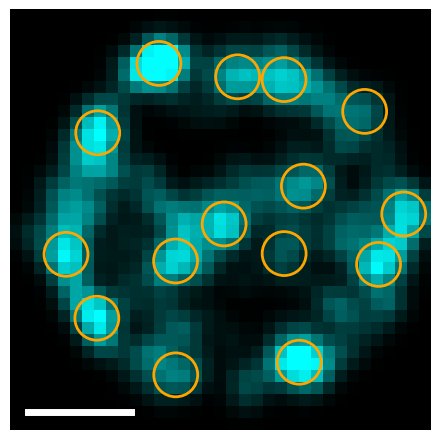

In [33]:
# Export video
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(1, 1)
all_avaliable_frames = set(df["t"].unique())

cmap_color_end = "#00274C"
cmap_color_start = "#FFCB05"
cmap_name = "maize2blue"
N = track.shape[0]
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=N
)


def animate(frame):
    ax.clear()
    img_blue = video[frame - 1, :, :]
    plt.imshow(
        img_blue,
        cmap=cmap_img,
        vmax=2,
    )
    # Add current circle
    tracks = df[df["t"] == frame - 1]
    tracks = tracks.astype(float)
    plt.scatter(
        tracks.x,
        tracks.y,
        edgecolors="orange",
        s=1000,
        facecolors="none",
        lw=2,
    )

    # scale bar
    scale_bar_offset = 0
    scalebar_length_um = 1
    base_x = 1
    base_y = 33
    scalebar_length_pxl = scalebar_length_um / um_per_pixel
    plt.plot(
        [
            base_x + scale_bar_offset,
            base_x + scale_bar_offset + scalebar_length_pxl,
        ],
        [base_y + scale_bar_offset, base_y + scale_bar_offset],
        "-",
        color="white",
        lw=5,
    )
    plt.xlim(0, img_blue.shape[0])
    plt.ylim(0, img_blue.shape[1])
    ax.invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")


ani = FuncAnimation(fig, animate, frames=video.shape[0], interval=20, repeat=False)
writer = animation.FFMpegWriter(fps=25)  # 25 Hz, 50x playback (original:0.5Hz)
ani.save("movie_50xplayback.mp4", writer=writer)

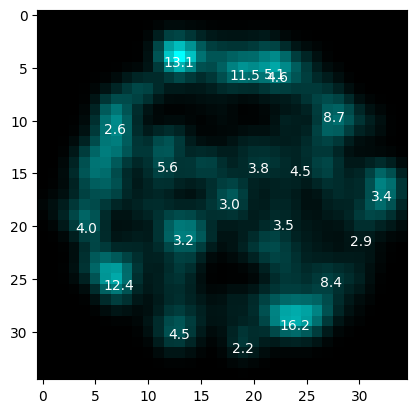

In [12]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(video[0], cmap=cmap_img)
tracks = df
tracks = tracks.astype(float)
for trackID in tracks["trackID"].unique():
    track = tracks[tracks["trackID"] == trackID]
    track = track.sort_values(["t"])
    # Calculate and print out speed at last
    x_nm = track["x"].to_numpy(float) * um_per_pixel * 1000
    y_nm = track["y"].to_numpy(float) * um_per_pixel * 1000
    t_s = track["t"].to_numpy(float) * s_per_frame
    speed = np.mean(
        np.sqrt((x_nm[1:] - x_nm[:-1]) ** 2 + (y_nm[1:] - y_nm[:-1]) ** 2)
        / (t_s[1:] - t_s[:-1])
    )
    plt.text(
        track["x"].mean() - 1, track["y"].mean(), str(round(speed, 1)), color="white"
    )


plt.savefig(
    "ref_with_nm_per_s.png",
    format="png",
    dpi=300,
    bbox_inches="tight",
)

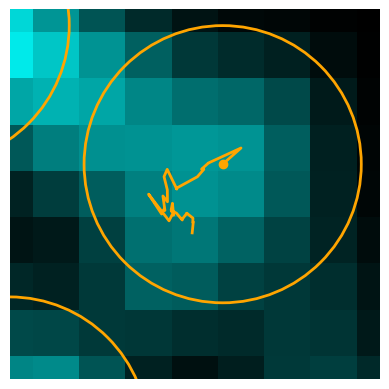

In [25]:
center_x = 28
center_y = 9
pad = 4

for frame in [0, 16, 32, 48]:
    plt.close()
    fig, ax = plt.subplots(1, 1)
    im = ax.imshow(video[frame], cmap=cmap_img, vmax=1.5)

    for x, y in zip(df[df.t == frame].x, df[df.t == frame].y):
        c = plt.Circle((x, y), 3, color="orange", fill=False, lw=2)
        ax.add_patch(c)
        ax.scatter(x, y, color="orange")

    tracks = df[df.t <= frame]
    tracks = tracks.astype(float)
    for trackID in tracks["trackID"].unique():
        track = tracks[tracks["trackID"] == trackID]
        track = track.sort_values(["t"])
        plt.plot(
            track.x,
            track.y,
            color="orange",
            lw=2,
        )

    plt.xlim(center_x - pad, center_x + pad)
    plt.ylim(center_y - pad, center_y + pad)

    plt.axis("off")
    ax.invert_yaxis()
    plt.savefig(
        "x-" + str(center_x) + "-y-" + str(center_y) + "-frame-" + str(frame) + ".png",
        format="png",
        dpi=300,
        bbox_inches="tight",
    )